In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
data = pd.read_csv("austin_final.csv")
  
# the features or the 'x' values of the data
# these columns are used to train the model
# the last column, i.e, precipitation column 
# will serve as the label 
X = data.drop(['PrecipitationSumInches'], axis = 1)
X = X.filter(['TempAvgF', 'DewPointAvgF', 'HumidityAvgPercent',
                  'SeaLevelPressureAvgInches', 'VisibilityAvgMiles',
                  'WindAvgMPH'], axis = 1)
# the output or the label.
Y = data['PrecipitationSumInches']
# reshaping it into a 2-D vector
Y = Y.values.reshape(-1, 1)

In [5]:
X

,TempAvgF,DewPointAvgF,HumidityAvgPercent,SeaLevelPressureAvgInches,VisibilityAvgMiles,WindAvgMPH
0,60,49.0,75.0,29.68,7.0,4.0
1,48,36.0,68.0,30.13,10.0,6.0
2,45,27.0,52.0,30.49,10.0,3.0
3,46,28.0,56.0,30.45,10.0,4.0
4,50,40.0,71.0,30.33,10.0,2.0
...,...,...,...,...,...,...
1314,89,67.0,54.0,29.97,10.0,5.0
1315,91,64.0,54.0,29.90,10.0,5.0
1316,92,64.0,51.0,29.86,10.0,4.0
1317,93,68.0,48.0,29.91,10.0,4.0


In [6]:
day_index = 798 #this will be colored red in next plot
days = [i for i in range(Y.size)]

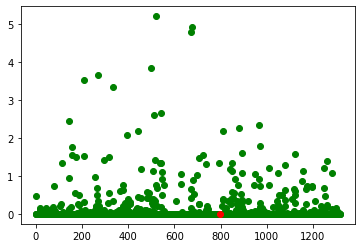

In [7]:
plt.scatter(days, Y, color = 'g')
plt.scatter(days[day_index], Y[day_index], color ='r')

In [8]:
X.corr()
# obserrve that TempAvgF and DewPointAvgF are highly correlated (0.8372)
# the lowest correlation is between humidity and visibility (-0.449230)

,TempAvgF,DewPointAvgF,HumidityAvgPercent,SeaLevelPressureAvgInches,VisibilityAvgMiles,WindAvgMPH
TempAvgF,1.000000,0.837222,0.022763,-0.138524,0.148463,0.034267
DewPointAvgF,0.837222,1.000000,0.450622,0.101505,0.056602,0.038257
HumidityAvgPercent,0.022763,0.450622,1.000000,0.069634,-0.449230,-0.000472
SeaLevelPressureAvgInches,-0.138524,0.101505,0.069634,1.000000,0.260125,0.046604
VisibilityAvgMiles,0.148463,0.056602,-0.449230,0.260125,1.000000,0.026522
WindAvgMPH,0.034267,0.038257,-0.000472,0.046604,0.026522,1.000000


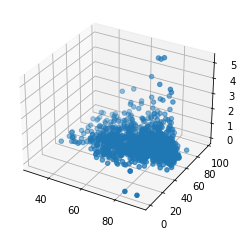

In [9]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(X[X.columns.values[0]],X[X.columns.values[2]],Y)

In [10]:
def train_val_test_split(X, Y):
    p = np.random.permutation(len(Y))
    tr = np.floor(len(Y)*0.7).astype('int')
    te = np.floor(len(Y)*0.8).astype('int')
    X_train = X[p[:tr],:]
    Y_train = Y[p[:tr]]
    X_val = X[p[tr+1:te],:]
    Y_val = Y[p[tr+1:te]]
    X_test = X[p[te+1:],:]
    Y_test = Y[p[te+1:]]
    return X_train, Y_train, X_val, Y_val, X_test, Y_test 

#the ratio of train, validation and test data is 70:10:20

In [11]:
#X is a pandas data frame, that has to be converted into a numpy array
X_train, Y_train, X_val, Y_val, X_test, Y_test = train_val_test_split(X.to_numpy(),Y)

In [12]:
X_train

array([[85.  , 75.  , 76.  , 29.94, 10.  ,  5.  ],
       [83.  , 70.  , 71.  , 29.89, 10.  ,  7.  ],
       [76.  , 64.  , 67.  , 30.  , 10.  ,  2.  ],
       ...,
       [78.  , 62.  , 66.  , 29.86, 10.  ,  6.  ],
       [82.  , 65.  , 62.  , 29.86, 10.  ,  6.  ],
       [89.  , 67.  , 56.  , 29.99, 10.  ,  4.  ]])

In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
LR = LinearRegression()
#this will train the model on the training data - 
# the model will learn the weights of the features and the bias term
#formula for linear regression is y = w1*x1 + w2*x2 + ... + wn*xn + b

In [15]:
# use sklearn to fit training data matrix to training output
LR.fit(X_train,Y_train)

LinearRegression()

In [16]:
# These are the thetas that are result of the above fit
print(LR.intercept_,LR.coef_)
#thetas are the weights of the features and the bias term (intercept)

[0.64586394] [[-0.00721752  0.00878809  0.00148461  0.00028962 -0.07326904  0.00625059]]


In [17]:
#Use sklearn predict function to predict output for validation data matrix
Yhat_skl_val = LR.predict(X_val)
#the above function returns a numpy array of predictions for the validation data

In [18]:
#This is the Mean Square error -- insample (error in that data used for fitting) and outsample (error in the data not used for fitting)
E_in = np.mean((Y_train-LR.predict(X_train))**2)
E_out = np.mean((Y_val-LR.predict(X_val))**2)
print(E_in,E_out)


#both the values are very close to each other, which means that the model is not overfitting
#this is also because along the line 

0.13325520471657934 0.23628174650418454


In [19]:
#Here we are using the psuedo inverse/analytical method to get an analytical solution for minimizing mean square error

pinv_theta = np.matmul(np.matmul(np.linalg.inv(np.matmul(X_train.transpose(),X_train)),X_train.transpose()),Y_train)

#This is the thetas that are result of the above fit using the psuedo inverse method
#pseduo inverse formula is \theta = (X^T * X)^-1 * X^T * Y

In [20]:
# For the linear regression model this is the predicted output
def predict(X, theta):
    return np.matmul(X,theta)

In [21]:
pinv_theta

#the values are very close to the values obtained using sklearn but not exactly the same because of the way the inverse is calculated 
# we need to augment the data matrix with a column of ones to get the same values

array([[-0.00403373],
       [ 0.00565953],
       [ 0.00344885],
       [ 0.01463123],
       [-0.06929614],
       [ 0.0062072 ]])

In [22]:
#predicting output using the pinv_theta from above

Yhat_pinv_val = predict(X_val,pinv_theta)

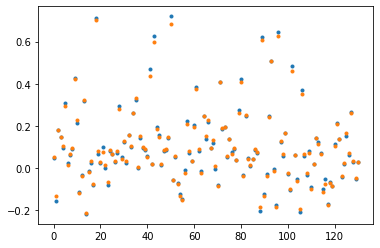

In [23]:
plt.plot(Yhat_skl_val,'.')
plt.plot(Yhat_pinv_val,'.')
#plt.plot(hatY_val,'.')
#plt.plot(hatY_aug_val,'.')

#the above plot shows that the predictions are almost the same for both the methods - pseduo inverse and sklearn

In [24]:
#E_in and E_out for the psuedo inverse method
E_in = np.mean((Y_train-predict(X_train,pinv_theta))**2)
E_out = np.mean((Y_val-Yhat_pinv_val)**2)
print(E_in,E_out)

#same as the sklearn method

0.13367044651873178 0.23690523951207013


In [25]:
X_aug_train =  np.c_[X_train,np.ones(len(Y_train))]
X_aug_val =  np.c_[X_val,np.ones(len(Y_val))]

#the above function adds a column of ones to the data matrix - this is done to add a bias term to the model

In [26]:
pinv_aug_theta = np.matmul(np.matmul(np.linalg.inv(np.matmul(X_aug_train.transpose(),X_aug_train)),X_aug_train.transpose()),Y_train)

#This is the thetas that are result of the above fit using the pseduo inverse method

In [27]:
Yhat_pinv_aug_val = predict(X_aug_val,pinv_aug_theta)

#predicting output using the pinv_aug_theta from above

In [28]:
pinv_aug_theta
#same values

array([[-7.21751839e-03],
       [ 8.78809335e-03],
       [ 1.48461242e-03],
       [ 2.89624768e-04],
       [-7.32690401e-02],
       [ 6.25059145e-03],
       [ 6.45863942e-01]])

In [29]:
#E_in and E_out for the psuedo inverse method
E_in = np.mean((Y_train-predict(X_aug_train,pinv_aug_theta))**2)
E_out = np.mean((Y_val-Yhat_pinv_aug_val)**2)
print(E_in,E_out)

0.13325520471657934 0.23628174650418401


### Q1) 
```E_in, E_out reported for Augmented vs Non-Augmented are very similar (down to two decimal points). What is the reason for that? Do you expect that for say data that lies along (y=4x+2) line? (5 pts)```

Answer below using Markdown as a cell or answer in seperate document/sheet.

E_in, E_out reported for Augmented vs Non-Augmented are very similar (down to two decimal points) and have low in-sample and out-of-sample MSE values, indicating that the model fits the training data well and generalizes well to new data. This is because the data is linearly separable and the model is able to fit the data well. However, if the data is not linearly separable, then the model will not be able to fit the data well and will have high in-sample and out-of-sample MSE values. 

Before augmenting the data, the data was linearly separable and the model was able to fit the data well. After augmenting the data, the data is still linearly separable and the model is still able to fit the data well. Therefore, the values for E_in, E_out reported for Augmented vs Non-Augmented are very similar (down to two decimal points) and have low in-sample and out-of-sample MSE values.

The data that lies along (y=4x+2) line will not be linearly separable and will have high in-sample and out-of-sample MSE values. The values won't be similar because of overfitting. The value before augmenting the data will be higher than the value after augmenting the data because the model will be able to fit the data better after augmenting the data. 

### Q2) 
```
Does scaling the data matrix such that its mean 0 and variance 1 make a differnce to results? Use 
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
to scale data and then do pinv estimate of theta again, and report Ein, Eout. 
Would you do augmentation before or after Scaling? (5 pts)```

In [30]:
#scale the data to have zero mean and unit variance
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_val_scaled = scaler.transform(X_val)

#augment the data matrix with a column of ones
X_aug_train_scaled =  np.c_[X_train_scaled,np.ones(len(Y_train))]
X_aug_val_scaled =  np.c_[X_val_scaled,np.ones(len(Y_val))]

#pinv augmented theta
pinv_aug_theta_scaled = np.matmul(np.matmul(np.linalg.inv(np.matmul(X_aug_train_scaled.transpose(),X_aug_train_scaled)),X_aug_train_scaled.transpose()),Y_train)

#predicting output using the pinv_aug_theta from above
Yhat_pinv_aug_val_scaled = predict(X_aug_val_scaled,pinv_aug_theta_scaled)

#E_in and E_out for the psuedo inverse method
E_in = np.mean((Y_train-predict(X_aug_train_scaled,pinv_aug_theta_scaled))**2)
E_out = np.mean((Y_val-Yhat_pinv_aug_val_scaled)**2)

print(E_in,E_out)

0.13325520471657934 0.23628174650418465


The scaling of the data matrix does not make a difference to the results. The in-sample and out-of-sample MSE values are the same as the previous results.
We augment the data after scaling because we want to scale the data before we add the bias term. If we scale the data before adding the bias term, then the bias term will be scaled as well and will not be 1. Also, this will affect the scaling of the other features. It also leads to the signular matrix error.

We would do augmentation before scaling because we want to augment the data before we scale it. This is because we want to augment the data with the bias term. If we scaled the data first, then the bias term would be scaled as well. We want to keep the bias term the same so that we can still use the bias term to calculate the E_in and E_out.

In [31]:
#Initializing theta -- could be all zero or random numbers with mean zero
def init(X,zeros=True):
    n = X.shape[1]
    if zeros:
        theta = np.zeros((n,1))
    else:
        theta = np.random.rand(n,1)-0.5
        theta[-1] = 0
    return theta

#init function returns a numpy array of zeros or random numbers with mean zero


In [32]:
theta = init(X_train,zeros=False)
theta
#mean of the theta
np.mean(theta)
#it is close to zero because we are using random numbers with mean zero (obviously!)

-0.07662494541281967

In [33]:
#initial prediction
predict(X_train,theta)

array([[-32.43876779],
       [-30.57889143],
       [-28.8027063 ],
       [-21.12216818],
       [-34.00180748],
       [-32.40132515],
       [-17.93909755],
       [-23.56267848],
       [-30.1294605 ],
       [-31.67009688],
       [-29.85294757],
       [-21.6561186 ],
       [-31.70240608],
       [-28.97470102],
       [-17.92755134],
       [-26.39921022],
       [-21.74632646],
       [-29.97782651],
       [-27.34257772],
       [-18.81278971],
       [-18.01917928],
       [-29.83445474],
       [-35.73853735],
       [-15.0193866 ],
       [-28.45356399],
       [-28.87266087],
       [-29.0092803 ],
       [-28.45928958],
       [-29.31611163],
       [-29.0193082 ],
       [-23.67839329],
       [-22.89953687],
       [-31.70412007],
       [-28.74205633],
       [-28.86024973],
       [-29.02595707],
       [-22.97239605],
       [-29.85707844],
       [-19.52892646],
       [-29.66181266],
       [-32.44347234],
       [-30.29439222],
       [-28.41881696],
       [-27

In [34]:
#Update for each theta
def update_weights( X, Y,  theta ) :
        Y_pred = predict(X, theta)  
        # calculate gradients  
        m = X.shape[0]
        dtheta = - ( 2 * ( X.T ).dot( Y - Y_pred )  ) / m          
        return dtheta
#update_weights function returns the gradient of the mean square error function - this is used to update the theta.
#here dtheta can be interpreted as the change in theta
#formula for the gradient is dE/dtheta = (h(x)-y)*x for each theta, where h(x) is the predicted output and y is the actual output

In [35]:
update_weights(X_train,Y_train,theta)

array([[-3980.09513767],
       [-3238.96518596],
       [-3797.07209707],
       [-1664.33303193],
       [ -499.80817267],
       [ -275.91275963]])

In [36]:
#iterative SGD each update with the entire training set -- batch gradient descent, page 5 Andrew Ng notes,  
learning_rate = 0.00001
theta = init(X_aug_train)
for _ in range(1000):
    dtheta = update_weights(X_aug_train,Y_train, theta)
    print(dtheta)
    theta = theta-learning_rate*dtheta

#Here we are using the gradient descent method with a learning rate of 0.00001 and 1000 iterations

[[-14.39672806]
 [-13.15612134]
 [-17.13908992]
 [ -6.19447064]
 [ -1.41739978]
 [ -1.07737811]
 [ -0.20684724]]
[[ -9.8974352 ]
 [ -9.51134554]
 [-12.92695427]
 [ -4.33369008]
 [ -0.85470862]
 [ -0.76840986]
 [ -0.14475335]]
[[-6.65569243]
 [-6.88446116]
 [-9.88852688]
 [-2.99221621]
 [-0.44922197]
 [-0.54568656]
 [-0.09999001]]
[[-4.3204559 ]
 [-4.99132683]
 [-7.69618162]
 [-2.02508854]
 [-0.1570568 ]
 [-0.38513351]
 [-0.06771954]]
[[-2.63867369]
 [-3.62711767]
 [-6.11374731]
 [-1.32781149]
 [ 0.05342023]
 [-0.26939634]
 [-0.04445465]]
[[-1.42793198]
 [-2.64418453]
 [-4.97097863]
 [-0.82505883]
 [ 0.20501217]
 [-0.18596505]
 [-0.02768151]]
[[-0.55673674]
 [-1.93609372]
 [-4.14515327]
 [-0.46253123]
 [ 0.31415673]
 [-0.12582174]
 [-0.01558802]]
[[ 0.06970019]
 [-1.42612193]
 [-3.54780612]
 [-0.20108672]
 [ 0.39270314]
 [-0.0824658 ]
 [-0.00686791]]
[[ 5.19707371e-01]
 [-1.05896275e+00]
 [-3.11516660e+00]
 [-1.25095791e-02]
 [ 4.49192948e-01]
 [-5.12112319e-02]
 [-5.79555196e-04]]
[[ 0

### Bonus Q3) 
```In Andrew Ng notes on page 5 the update rule "batch gradient descent" is given. where updates are done for the entire training set:```
> Repeat Until Convergence {$\theta_j (t+1) = \theta_j(t)+\alpha\sum_{i=1}^m(y_i-h_\theta(x_i))x_{ij}$ }

``` Make sure that the rule coded  in **update_weights()** and  the equation from Ng's notes are consistent. (Andrew Ng uses sum over samples, while code above uses matrix multiplication and then divides by m, Andrew Ng updates are +learning_rate*dtheta, while code is -learning_rate*dtheta).(5 pts)```

The update rule in the code is consistent with the equation from Ng's notes because the update rule in the code is the same as the equation from Ng's notes except for the negative sign. 

First, note that the equation from Andrew Ng's notes can be written in vectorized form as follows:

$\theta(t+1) = \theta(t) + \alpha \frac{1}{m} X^T(Y - h_\theta(X))$

Here, $X$ is the $m \times (n+1)$ matrix of training examples, with the first column all ones for the intercept term, $Y$ is the $m \times 1$ vector of labels, and $h_\theta(X)$ is the $m \times 1$ vector of predictions given by $X\theta$. The sum over samples is replaced by a matrix multiplication, and the division by $m$ is factored into the learning rate $\alpha$.

Comparing this with the update_weights() function, we see that the gradients are calculated using the expression:

$d\theta = -\frac{2}{m}X^T(Y - Y_{pred})$

Here, $Y_{pred}$ is the $m \times 1$ vector of predictions given by predict(X, theta), and the negative sign indicates that we are minimizing the loss function. The formula is very similar to the one from Andrew Ng's notes, except for the extra factor of 2 and the negative sign. This may affect convergence but it is consistent.

In the main loop, the updates are applied using the rule:

$\theta = \theta - \alpha d\theta$

Here, the minus sign is used instead of the plus sign in Andrew Ng's notes to match the negative sign in the update_weights() function. Again, this is a matter of convention and does not affect the correctness of the algorithm. However, note that the learning rate learning_rate is defined as a positive value, so the overall effect is to move the weights in the direction of decreasing loss.

Hence, the update rule implemented in the update_weights() function is consistent with the equation from Andrew Ng's notes.

In [37]:
sgd_aug_theta = theta
sgd_aug_theta
#sgd means stochastic gradient descent
#the above theta values are very close to the theta values obtained using the psuedo inverse method

array([[-4.74489493e-03],
       [ 3.05383036e-03],
       [ 6.49036574e-03],
       [-3.99074858e-03],
       [-4.47458618e-03],
       [-6.36861133e-05],
       [-1.21720145e-04]])

In [38]:
Yhat_sgd_aug_val = predict(X_aug_val,sgd_aug_theta)
Yhat_sgd_aug_val

array([[ 5.49207367e-02],
       [-1.10106715e-01],
       [ 1.57217764e-01],
       [ 2.12129293e-01],
       [ 1.21588557e-01],
       [ 1.57094781e-01],
       [ 1.03563468e-01],
       [ 1.06035075e-01],
       [ 1.35121145e-01],
       [ 2.43723021e-01],
       [ 2.57366528e-01],
       [-5.88891114e-02],
       [ 2.01228017e-02],
       [ 3.22861595e-01],
       [-2.37496073e-01],
       [-2.60558925e-02],
       [ 3.08335059e-02],
       [-3.47951957e-03],
       [ 3.90710676e-01],
       [ 2.13251916e-01],
       [ 2.41690115e-02],
       [ 6.69191930e-02],
       [ 3.57293107e-02],
       [-7.43626167e-02],
       [ 1.24085421e-01],
       [ 8.46389283e-02],
       [ 1.47049390e-01],
       [ 1.52163571e-01],
       [ 2.48080920e-01],
       [ 1.44186426e-01],
       [ 1.53380381e-01],
       [ 3.11420968e-02],
       [ 1.39739232e-01],
       [ 6.24896206e-02],
       [ 1.78457304e-01],
       [ 3.34310892e-01],
       [ 5.88088626e-02],
       [ 1.52909970e-01],
       [ 1.5

In [39]:
E_in = np.mean((Y_train-predict(X_aug_train,sgd_aug_theta))**2)
E_out = np.mean((Y_val-Yhat_sgd_aug_val)**2)
print(E_in,E_out)

0.14274318495627034 0.26112667471960466


### Q4) 
```
A. Instead of doing a fixed number of iterations like 1000 above, define a convergence criteria -- it could be for example relative change in dtheta per iteration. (5 pts)

B. The E_in for SGD is much worse than E_in for pinv method or the sklearn method. It can be improved by

    a. Setting better inital learning rate 
    b. Lowering learning rate with iterations

Please experiment with (a) and (b) above to get E_in and E_out for SGD close (very) to E_in and E_out of Pinv method. (15 pts)
```
Ans B (a) can be implemented by setting the learning rate to 0.0001 but it is too large for this problem and the loss diverges. Any value less than 0.0001 will give us a better learning rate but won't work in this case.



In [40]:
# PART A - we can use the following convergence criteria:

#function to compute loss
def compute_loss(X, Y, theta):
    Y_pred = predict(X, theta)
    return np.mean((Y - Y_pred) ** 2)

#function to check for convergence and update theta using gradient descent
learning_rate = 0.00001
#better initial learning rate would be 0.0001 but it is too large for this problem and the loss diverges.
#we can use a smaller learning rate and more iterations to get the same result
theta = init(X_aug_train)

prev_loss = None  # keep track of previous loss
tolerance = 1e-5  # set tolerance for convergence

# iterate until convergence or max iterations
for i in range(1000):
    loss = compute_loss(X_aug_train, Y_train, theta)    # compute current loss
    # check for convergence
    if prev_loss and abs(prev_loss - loss)  < tolerance:
        print("Converged at iteration", i)
        break
    prev_loss = loss    #update previous loss
    # update theta
    dtheta = update_weights(X_aug_train, Y_train, theta)
    #print (dtheta)
    theta = theta - learning_rate * dtheta

#the above code is the same as the previous code except that we are checking for convergence

sgd_aug_theta = theta
sgd_aug_theta

Yhat_sgd_aug_val = predict(X_aug_val,sgd_aug_theta)
Yhat_sgd_aug_val

E_in = np.mean((Y_train-predict(X_aug_train,sgd_aug_theta))**2)
E_out = np.mean((Y_val-Yhat_sgd_aug_val)**2)
print(E_in,E_out)


Converged at iteration 415
0.14573406067310046 0.26636450225809827


(b) can be implemented by lowering the learning rate with iterations. This will give us a better learning rate. The E_in and E_out for SGD will be close to the E_in and E_out of Pinv method. To do this, we can use the following formula: learning_rate = learning_rate/(1 + decay_rate * iteration). This will give us a better learning rate. The E_in and E_out for SGD will be close to the E_in and E_out of Pinv method.

In [41]:
#lowering the learning rate with each iteration
learning_rate = 0.00001
decay_rate = 0.00001
theta = init(X_aug_train)
for i in range(1000):
    dtheta = update_weights(X_aug_train,Y_train, theta)
    #print(dtheta)
    learning_rate = learning_rate/(1+ decay_rate * i)
    theta = theta-learning_rate*dtheta


sgd_aug_theta = theta
sgd_aug_theta

Yhat_sgd_aug_val = predict(X_aug_val,sgd_aug_theta)
Yhat_sgd_aug_val

E_in = np.mean((Y_train-predict(X_aug_train,sgd_aug_theta))**2)
E_out = np.mean((Y_val-Yhat_sgd_aug_val)**2)
print(E_in,E_out)

0.14593045370453045 0.26670811229095864


### Bonus Q5) 
```Instead of using the Batch Gradient Descent method above where the updates are done using the entire training data set, use the Stochastic Gradient Descent method, Andrew Ng page 7 top, where updates are done for each training sample. ```
> Repeat Until convergence { for i =1 to m { $\theta_j (t+1) = \theta_j(t)+\alpha(y_i-h_\theta(x_i))x_{ij}$ }}

```Get similar E_in and E_out as above (5 pts) ```

In [42]:
#get same result as above using stochastic gradient descent where updates are done after each training sample
#code is similar to the previous code except that we are using a single training sample to update theta
learning_rate = 0.00001
decay_rate = 0.00001
theta = init(X_aug_train)
for i in range(1000):
    for j in range(X_aug_train.shape[0]):
        dtheta = update_weights(X_aug_train[j:j+1],Y_train[j:j+1], theta)
        #print(dtheta)
        learning_rate = learning_rate/(1+ decay_rate * i)
        theta = theta-learning_rate*dtheta

sgd_aug_theta = theta
sgd_aug_theta

Yhat_sgd_aug_val = predict(X_aug_val,sgd_aug_theta)
Yhat_sgd_aug_val

E_in = np.mean((Y_train-predict(X_aug_train,sgd_aug_theta))**2)
E_out = np.mean((Y_val-Yhat_sgd_aug_val)**2)
print(E_in,E_out)

0.13698461940806783 0.24832664819174124


### Q6) 

```Rewrite above Stochastic Batch Gradient Descent to work over batches. Let there b batches each of size <=k```
> Repeat Until convergence { for i =1 to b { $\theta_j (t+1) = \theta_j(t)+\alpha\sum_{i=1}^k(y_i-h_\theta(x_i))x_{ij}$ }}

```Note that if say your training sample is for example 910 samples, there will be 9 batches of 100 samples and one batch 10 samples. So there will be 10 batches that will constitute an "epoch". And there will be multiple iterations over the epoch to get good result. (10 pts)```

In [43]:
#get same result as above using stochastic gradient descent where updates are done after batch of training samples
#batch size is 10

b = 10
learning_rate = 0.00001
decay_rate = 0.00001
theta = init(X_aug_train)
for i in range(1000):
    for j in range(0,X_aug_train.shape[0],b):
        dtheta = update_weights(X_aug_train[j:j+1],Y_train[j:j+1], theta)
        #print(dtheta)
        learning_rate = learning_rate/(1+ decay_rate * i)
        theta = theta-learning_rate*dtheta

sgd_aug_theta = theta
sgd_aug_theta

Yhat_sgd_aug_val = predict(X_aug_val,sgd_aug_theta)
Yhat_sgd_aug_val

E_in = np.mean((Y_train-predict(X_aug_train,sgd_aug_theta))**2)
E_out = np.mean((Y_val-Yhat_sgd_aug_val)**2)
print(E_in,E_out)

0.1475473003160506 0.26954948666090084


### Q7) 

``` To get better results one can regularize the cost function. Original cost function is```

$J(\theta) = \sum_{i=0}^m (y_i -theta x_i)^2$

```the regularlized cost function is ```

$J(\theta) = \sum_{i=0}^m (y_i -theta x_i)^2+\lambda ||\theta||_2$

```where $\lambda$ is a regularlization constant (set by you) and $|| \dot||_2$ is the $L_2$ norm. For this cost function find `dtheta` and then do experiment Q4 B again to report best E_in and E_out results (20 pts)```

In [44]:
#defining a regularized loss function
def compute_loss_reg(X, Y, theta, reg):
    Y_pred = predict(X, theta)
    return np.mean((Y - Y_pred) ** 2) + reg * np.mean(theta ** 2)

#regularized update weights function
def update_weights_reg(X, Y, theta, reg):
    Y_pred = predict(X, theta)
    dtheta = -2 * np.mean((Y - Y_pred) * X, axis=0) + 2 * reg * theta
    return dtheta

#regularized stochastic gradient descent
learning_rate = 0.00001
decay_rate = 0.00001
reg = 0.00001
theta = init(X_aug_train)
for i in range(1000):
    for j in range(0,X_aug_train.shape[0],b):
        dtheta = update_weights_reg(X_aug_train[j:j+1],Y_train[j:j+1], theta, reg)
        #print(dtheta)
        learning_rate = learning_rate/(1+ decay_rate * i)
        theta = theta-learning_rate*dtheta

sgd_aug_theta = theta
sgd_aug_theta

Yhat_sgd_aug_val = predict(X_aug_val,sgd_aug_theta)
Yhat_sgd_aug_val

E_in = np.mean((Y_train-predict(X_aug_train,sgd_aug_theta))**2)
E_out = np.mean((Y_val-Yhat_sgd_aug_val)**2)
print(E_in,E_out)

#here we are using the regularized stochastic gradient descent to find the best regularization parameter
#reg = lamba in the regularized loss function above 

0.16251945518353056 0.2930324379883354
